In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cluster_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [8]:
df.describe(include='object').transpose()

,count,unique,top,freq
origin,392,3,usa,245
name,392,301,amc matador,5


In [9]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [10]:
df_w_dummies = pd.get_dummies(df.drop('name', axis=1))

In [13]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [17]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [18]:
scaled_df = pd.DataFrame(data=scaled_data, columns=df_w_dummies.columns)

In [19]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<AxesSubplot:>

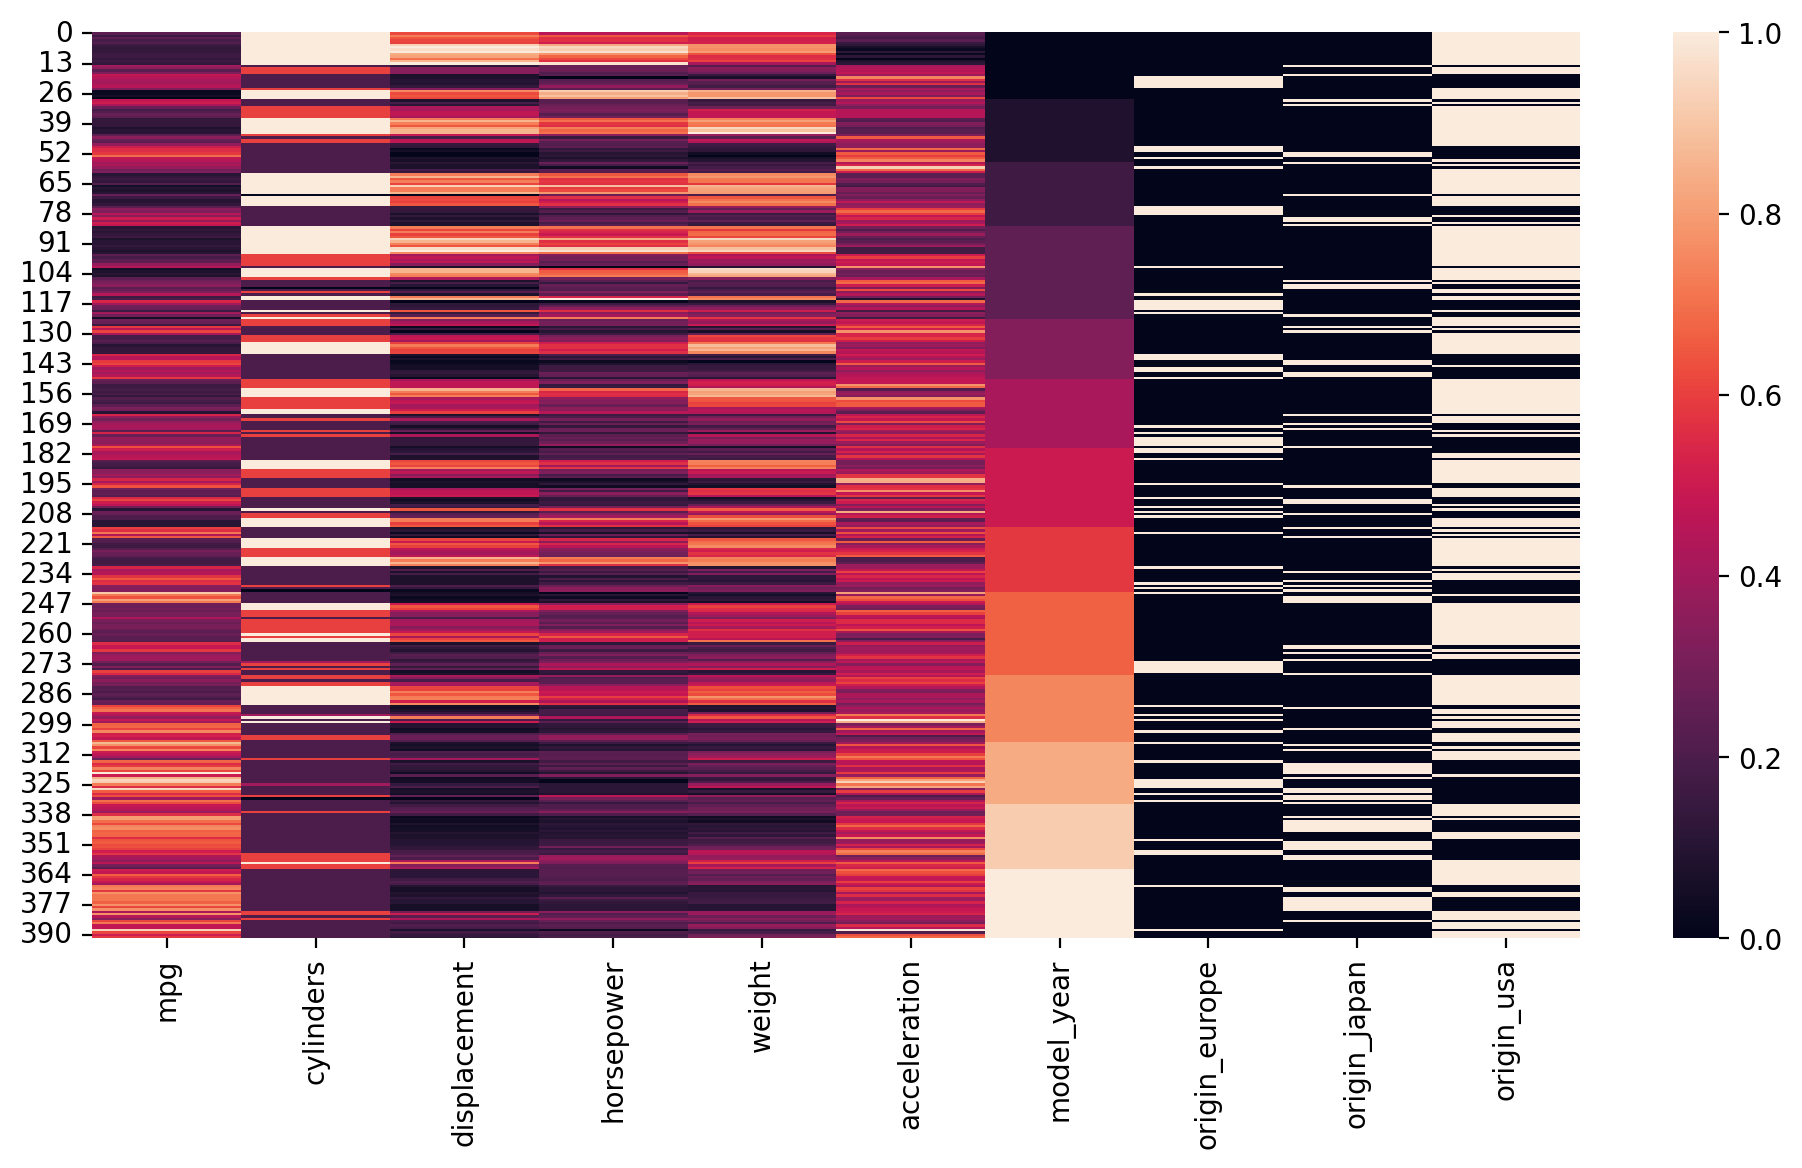

In [20]:
plt.figure(figsize=(12, 6), dpi=200)

sns.heatmap(data=scaled_df)

In [21]:
len(df)

392

<Figure size 2400x1200 with 0 Axes>

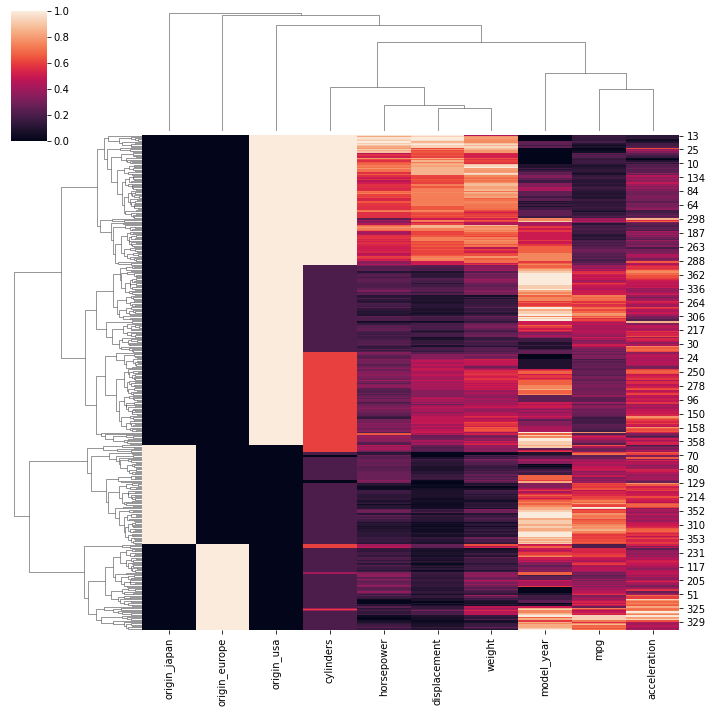

In [22]:
plt.figure(figsize=(12, 6), dpi=200)

sns.clustermap(data=scaled_df)

<Figure size 2400x1200 with 0 Axes>

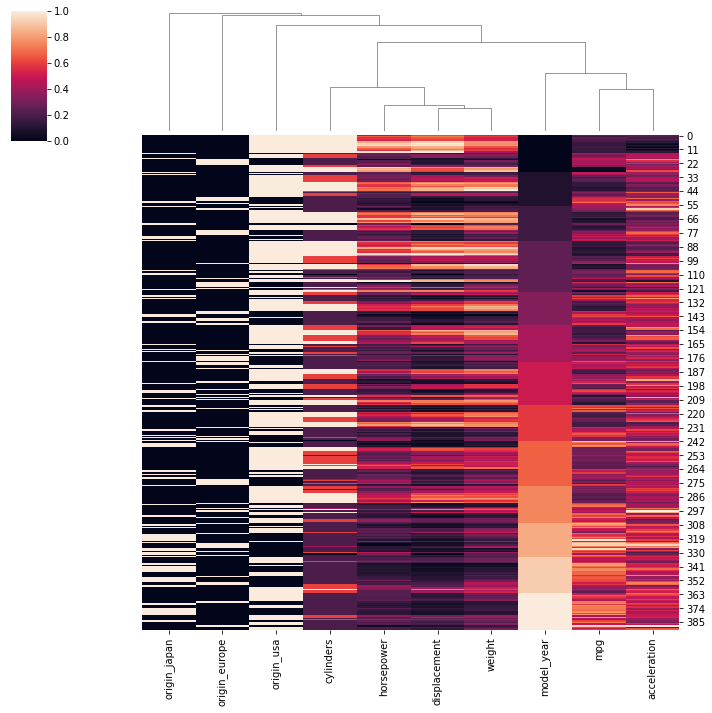

In [23]:
plt.figure(figsize=(12, 6), dpi=200)

sns.clustermap(data=scaled_df, row_cluster=False)

<Figure size 2400x1200 with 0 Axes>

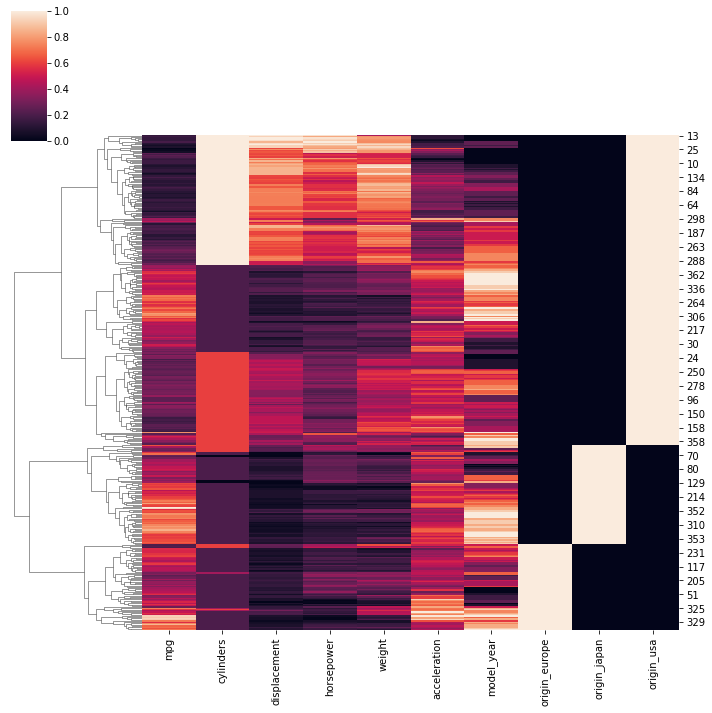

In [24]:
plt.figure(figsize=(12, 6), dpi=200)

sns.clustermap(data=scaled_df, col_cluster=False)